# Home Credit Default Risk Assessment

## Domain Background
Every bank has a several strategies to acquire customers for their different lines of business like home loans, auto loans, credit cards etc. Before providing any form of loan to the customers the financial institutions need to assess the Credit Risk.<br>
Credit risk is the probable risk of loss resulting from a borrower's failure to repay a loan or meet contractual obligations. Traditionally, it refers to the risk that a lender may not receive the owed principal and interest, which results in an interruption of cash flows and increased costs for collection.<br>
For the assessment of Credit Risk, the lenders calculate it based on the borrower's overall ability to repay. To assess credit risk on a consumer loan, lenders look at the five C's:  credit history, capacity to repay, capital, the loan's conditions and associated collateral. Based on the customers value for the five C's they provide a risk score for the customers and decide on whether they should provide the loan or not and if provided at what interset rate.

## Problem Statement
For the capstone project, I would like to try attempting to solve the Home Credit Default Risk Assessment problem posted as a kaggle competition. Details of the competion are available [here](https://www.kaggle.com/c/home-credit-default-risk)<br>
Many people struggle to get loans due to insufficient or non-existent credit histories. And, unfortunately, this population is often taken advantage of by untrustworthy lenders. Home Credit strives to broaden financial inclusion for the unbanked population by providing a positive and safe borrowing experience. As explained in the domain background using the five C's and performing statistical analysis to determine credit risk scores has always been the traditional approach which financial institutions. Home credit would like to use machine learning for this task, so that we could consider as many features as possible not just the five C's to determine whether the customer is a potential credit defaulter or not.

## Datasets and Inputs
Below are the availble source files provided in the competition
- application_{train|test}.csv : This is the main table, broken into two files for Train (with TARGET) and Test (without TARGET). One row represents one loan in the data sample. Most of the fields from this file will be used for this project.
- bureau.csv : All client's previous credits provided by other financial institutions that were reported to Credit Bureau (for clients who have a loan in the sample).For every loan in our sample, there are as many rows as number of credits the client had in Credit Bureau before the application date. 
- bureau_balance.csv: Monthly balances of previous credits in Credit Bureau.This table has one row for each month of history of every previous credit reported to Credit Bureau – i.e the table has (#loans in sample * # of relative previous credits * # of months where we have some history observable for the previous credits) rows. 
- POS_CASH_balance.csv: Monthly balance snapshots of previous POS (point of sales) and cash loans that the applicant had with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credits * # of months in which we have some history observable for the previous credits) rows.
- credit_card_balance.csv:Monthly balance snapshots of previous credit cards that the applicant has with Home Credit. This table has one row for each month of history of every previous credit in Home Credit (consumer credit and cash loans) related to loans in our sample – i.e. the table has (#loans in sample * # of relative previous credit cards * # of months where we have some history observable for the previous credit card) rows.
- previous_application.csv: All previous applications for Home Credit loans of clients who have loans in the sample.There is one row for each previous application related to loans in our data sample.
- installments_payments.csv:Repayment history for the previously disbursed credits in Home Credit related to the loans in the sample.There is 
     1. one row for every payment that was made plus 
     2. one row each for missed payment.One row is equivalent to one payment of one installment OR one installment corresponding to one payment of one previous Home Credit credit related to loans in our sample.
- HomeCredit_columns_description.csv This file contains descriptions for the columns in the various data files. This is just a data dictionary and we would not be using this for assessment.<BR>
All the files above (except the data dictionary) will be used by the project as each have either information of the previous credit accounts or information of previous balances and other details that could prove useful information of the customer and customer's likeliness to pay the loan.

## Solution Statement
The default risk problem is a classification problem where we would need to classify each customer as a defaulter or not. The solution to this kind of problem is to do an exploratory analysis on the fields provided in each of the input datasets and find the important features. And then using those features we can use machine learning classification algorithms to learn from the training dataset provided. We can measure the correctness of our solution by using the right evaluation metric (which will be discussed in a later section). Based on the metric scores if there is still room for improvement we can try different algorithms for classification or we can try tuning the parameters of the existing model to attain acceptable performance.

## Benchmark Model

This being a classification problem we can use the Decision trees clasifier algorithm as the baseline model. Why Decision Tress Classifier?
- They are well suited for these kind of problems
- They can be understood, they are more of a Whitebox model. Interpretation is very much required in finacial domain.
- They can be validated by statistical methods making them more reliable.
Using our chosen evaluvation metric, we will be able to measure the performance of our decision tree model which will tell how well the model performs on unseen data. 

## Evaluation Metrics

For classification model one of the most frequently used metric is 'accuracy'. But we cannot use 'accuracy' here because the distribution of the 'Target' feature(Credit defaulter or not) is highly biased. 

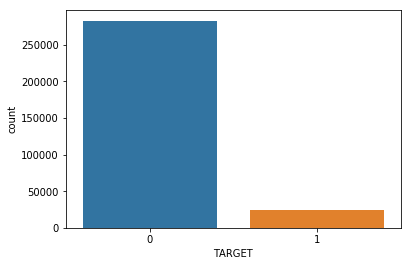

In [2]:
import  os 
import pandas as pd
import matplotlib.pyplot as pl
import seaborn as sns
import math as mt
import matplotlib.patches as mpatches
import numpy as np
%matplotlib inline

app_train = pd.read_csv("application_train.csv")
ax = sns.countplot(x='TARGET', data=app_train)

In the 'Target' field distribution, we can see that there are about 90% of 0's and 10% 1's. If we keep accuracy as the metric, even a classifier that predicts 0's all the time will have a 90% accuracy. So we need a better metric to estimate the performance of  both the benchmark model and the solution model. The evaluation metric provided in the Kaggle competition is area under the ROC Curve (AUC-ROC). This is definetely a good evaluation metric considering the target variable bias as it takes into consideration the sensitivity and the specificity of the predictions.

The Receiver Operating Characteristics curve (ROC) plots the False Positive Rate(FPR) vs True Postive Rate(TPR) with FPR on the x-axis and TPR on the y-axis. The area under this curve depicts the degree of seperablity between the two classes. So this metric measures how well the model is able to split the data into the right classes. If the AUC - ROC value is close to 1, it means the model is performing very well and if it close to 0 it means the model is performing poorly.

The TPR value is the Recall or Sensitivity value which is calculated as below:
$$TPR/Sensitivity/Recall = \frac{TP}{(TP+FN)}$$

The FPR value is complement of the specificity which is calculated as below:
$$Specificity = \frac{TN}{(TN+FP)}$$<br>
$$FPR = (1 - Specificity)$$
    $$= \frac{FP}{(TN+FP)}$$

We coud also use various other metrics as well like the F-score which tries to compare model with low precision and recall values. But I beleive based on this finance domain where mis-identifying false positives and false negatives both have impact on the companys revenue.

## Project Design

Below picture represents the design approach for the solving the Home Credit Default Risk Assessment Problem.<br>
![Design Flow](Flow.png)

**1. Exploratory Data Analysis**<br>
Before using the data for building our solution it is critical that we have a complete understanding of the data we have inhand. The dictionary file provided along with the dataset would help us with understanding the fields, the content of the files and the relationship between the files. In addition we would need to understand the below:
- Understand the dimensions of the data files and data type of the fields in each file
- Get a sense of the missing values in the data so that we can see how to handle them later.
- Profile the data fields to check the distrubution of the values, checking the distinct values, get the key statistics for each field
- Check for correlation between fields as they could be either used to create a new feature or be handled correctly to not affect the models performance
- Check for outliers and sparsity of the data as they will have significant impact on the models performance if not handled correctly.

**2. Data Pre-processing**
Based on the information we have from our EDA, we can then work on the below pre-processing steps.
- Handling Missing Values: If there are NA's identified in the data depending on their count and on the field we can appropriately handle the same.
- Removing non-pertinent and correlated fields: If we see there are highly correlated fields we can choose to elimate them except for one in the modelling. Also not every single field in the input files will have pertinent information. Based on our EDA, we can identify those fields and choose to eliminate them
- Normalizing fields: Based on the distribution of the values in the field, we can see if they need to be normalised to make sure the feature are on appropriate scale for modelling
- Transforming Fields: We may need to perform log transformations or create new features based on existing features to improve the model.
- Perform One hot encoding of features - For the categorical features with multiple classes, one hot encoding will help the model errors assuming relationship between classes
- Merging the data files: We need to merge the information in the different data files to feed it to the model.

**3. Feature Importance and Selection**
Once we have the data pre-processed, we can use the same to check which features are important so that they alone can be used for the modelling. This would make sure we dont have errors.
- Calculate the feature importance in the merged files using feature importance parameter in a decision tree classifier
- Select the features based on the importance for the model

**4. Splitting of Data**
We need to split the data for training, testing and validation sets so that it would help analyse and improve performance so as to acheive a bias-variance tradeoff
- Splitting data into train test and cross validation sets use K-fold validation

**4. Benchmark Model creation**
We will create the benchmark model with Decision trees classifier as mentioned in the previous section. We will use the sklearn library for the same and since we are looking to predict probablites we will be using the predict_proba method for the same.

**5. Benchmark Model Evaluation**
We will then evaluate the benchmark model with the AUC-ROC metric and see how well we are performing on the training , cross-validation and testing sets. Based on the results we will make some minor adjustments to the model and see if we can improve the performance of the benchmark model further. If not we would call the same the baseline and move with the solution for the project.

**6. Soultion based model creation**
For predicting the credit defaulters, we will be predicting the probablities and ensemble techniques are very efficient for these problems. The common ensemble techniques are bagging and boosting. For this project, we would be checking on both the techniques and see which performs better.
- Create a model using the Random Forest Classifier: This uses the bagging method and we will use the sklearn library
- Create a model using Gradient Boosting Machine Classifier: This uses the boosting method and we will use the LightGBM library

**7. Model Evaluvation**
We will then evaluate the models with the AUC-ROC metric and see how well we are performing on the training , cross-validation and testing sets. We would plot the results to compare and analyse the performance of the two models on the various datasets. Based on analysis we will check which parameters need further tuning to imporve the performance of the model.

**8. Hyper-parameter tunning**
Hyper-parameter tunning is the way we can minimize the error and improve the performance of the model. We would employ two different methods to do the tuning.
- For the Random Forest model we will use the Grid Search techinique to test different parameter sets.
- For Gradient Boosting Machine we will use automated tuning using Bayesian optimization Techniques.

*We will create functions for all process from step 4 through 8 and we create a pipeline to do more of a rinse and repeat of the steps till the model provides an much better improvement in performance over our score from the benchmark model.*

**9. Prediction**
Using the best model fitted we will predict the values for the test dataset provided by Kaggle and submit the same to see what our score is on the leaderboard.

## Implementation 

### Exploratory Data Analysis

In [2]:
print(os.listdir("../../data/homecredit/"))
path = "../../data/homecredit/"

['.RData', '.RDataTmp', '.Rhistory', 'all.zip', 'application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv', 'test.nb.html', 'test.Rmd']


**Reading the Data**

In [3]:
app_train = pd.read_csv(path+"application_train.csv")
app_test = pd.read_csv(path+"application_test.csv")
bur = pd.read_csv(path+"bureau.csv")
bur_bal = pd.read_csv(path+"bureau_balance.csv")
cre_bal = pd.read_csv(path+"credit_card_balance.csv")
inst_pay = pd.read_csv(path+"installments_payments.csv")
pos_cash = pd.read_csv(path+"POS_CASH_balance.csv")
prev_app = pd.read_csv(path+"previous_application.csv")

**Check dimensions and data types**

In [4]:
print("Shape of Application Train set:",app_train.shape)
print("Shape of Application Test set:",app_test.shape)

Shape of Application Train set: (307511, 122)
Shape of Application Test set: (48744, 121)


**Listing and analysis of string and categorical columns**

In [5]:
app_train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [6]:
print("Number of string columns:", app_train.dtypes[app_train.dtypes ==  object].shape)
app_train.dtypes[app_train.dtypes ==  object]

Number of string columns: (16,)


NAME_CONTRACT_TYPE            object
CODE_GENDER                   object
FLAG_OWN_CAR                  object
FLAG_OWN_REALTY               object
NAME_TYPE_SUITE               object
NAME_INCOME_TYPE              object
NAME_EDUCATION_TYPE           object
NAME_FAMILY_STATUS            object
NAME_HOUSING_TYPE             object
OCCUPATION_TYPE               object
WEEKDAY_APPR_PROCESS_START    object
ORGANIZATION_TYPE             object
FONDKAPREMONT_MODE            object
HOUSETYPE_MODE                object
WALLSMATERIAL_MODE            object
EMERGENCYSTATE_MODE           object
dtype: object

In [31]:
def get_unique_values(df):
    for col in df.columns:
        if(df[col].dtypes == 'object'):
            print(col," unique values:\t", df[col].unique())
        elif(df[col].unique().size <8):
            print(col," unique values:\t", df[col].unique())
get_unique_values(app_train)
get_unique_values(app_test)

TARGET  unique values:	 [1 0]
NAME_CONTRACT_TYPE  unique values:	 ['Cash loans' 'Revolving loans']
CODE_GENDER  unique values:	 ['M' 'F' 'XNA']
FLAG_OWN_CAR  unique values:	 ['N' 'Y']
FLAG_OWN_REALTY  unique values:	 ['Y' 'N']
NAME_TYPE_SUITE  unique values:	 ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']
NAME_INCOME_TYPE  unique values:	 ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']
NAME_EDUCATION_TYPE  unique values:	 ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
NAME_FAMILY_STATUS  unique values:	 ['Single / not married' 'Married' 'Civil marriage' 'Widow' 'Separated'
 'Unknown']
NAME_HOUSING_TYPE  unique values:	 ['House / apartment' 'Rented apartment' 'With parents'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
FLAG_MOBIL  unique values:	 [1 0]
FLAG_EMP_PHONE  unique values:	 [1 0]

In [8]:
#app_train.HOUSETYPE_MODE.unique().size
#app_train.AMT_INCOME_TOTAL.dtypes == 'object'
#app_train.HOUSETYPE_MODE.dtypes == 'object'

**Listing and Analysing all the integer and float columns**

In [8]:
print("Number of integer columns:", app_train.dtypes[app_train.dtypes == 'int64'].shape)

Number of integer columns: (41,)


In [9]:
print("Number of float columns:", app_train.dtypes[app_train.dtypes == 'float64'].shape)

Number of float columns: (65,)


In [10]:
app_train.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


**Check for NAs**

In [11]:
def missing_value_check(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[mis_val_table_ren_columns['Missing Values'] != 0]
    mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(by=['Missing Values'], ascending=False)
    return mis_val_table_ren_columns.round(1)
        
#app_train.apply(lambda x: sum(x.isnull()))
missing_values = missing_value_check(app_train)
missing_values.head(30)

,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [34]:
missing_values.tail(30)

,Missing Values,% of Total Values
LIVINGAREA_MEDI,154350,50.2
LIVINGAREA_MODE,154350,50.2
LIVINGAREA_AVG,154350,50.2
HOUSETYPE_MODE,154297,50.2
FLOORSMAX_MEDI,153020,49.8
FLOORSMAX_AVG,153020,49.8
FLOORSMAX_MODE,153020,49.8
YEARS_BEGINEXPLUATATION_AVG,150007,48.8
YEARS_BEGINEXPLUATATION_MEDI,150007,48.8
YEARS_BEGINEXPLUATATION_MODE,150007,48.8


**Visualize distributions**

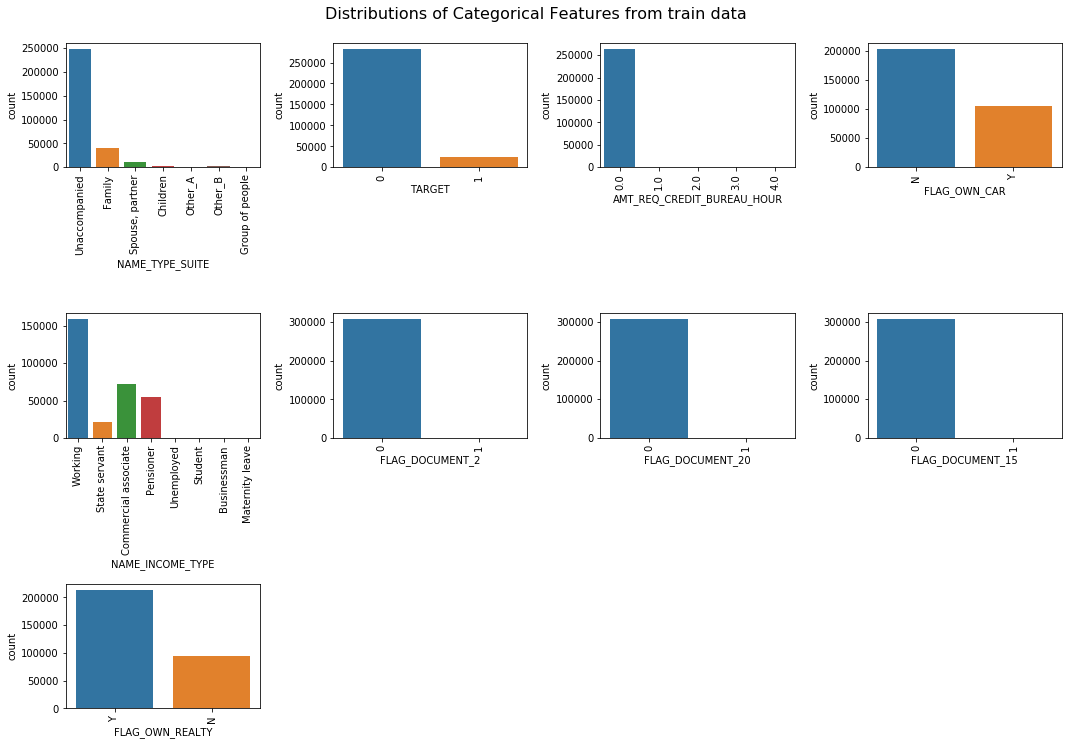

In [37]:
def distribution_hist(data,feature_list):
    cnt = len(feature_list)
    #row = mt.ceil(cnt/4)
    # Create figure
    fig = pl.figure(figsize = (11,5));
    for i, feature in enumerate(feature_list):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 40, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        #ax.set_xlim((0, 5))
        #ax.set_xticks([0, 1, 2, 3, 4, 5])
        #ax.set_xticklabels([0, 1, 2, 3, 4, ">5"])
    
       # Plot aesthetics
    #if transformed:
        #fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
           # fontsize = 16, y = 1.03)
    #else:
        fig.suptitle("Skewed Distributions of Continuous Census Data Features", fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()
def distribution_bar(data,disp,feature_list):
    cnt = len(feature_list)
    row = mt.ceil(cnt/4)
    # Create figure
    fig = pl.figure(figsize = (15,10));
    for i, feature in enumerate(feature_list):
        ax = fig.add_subplot(row, 4, i+1)
        ax = sns.countplot(x=feature, data=data)
        #ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        #ax.set_xlabel("Value")
        #ax.set_ylabel("Number of Records")
        #ax.set_xlim((0, 5))
        #ax.set_xticks([0, 1, 2, 3, 4, 5])
        #ax.set_xticklabels([0, 1, 2, 3, 4, ">5"])
        ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
    
       # Plot aesthetics
    #if transformed:
        #fig.suptitle("Log-transformed Distributions of Continuous Census Data Features", \
           # fontsize = 16, y = 1.03)
    #else:
        fig.suptitle("Distributions of Categorical Features from " + disp, fontsize = 16, y = 1.03)

    fig.tight_layout()
  #  fig.show()
distribution_bar(app_train,'train data',['NAME_TYPE_SUITE','TARGET','AMT_REQ_CREDIT_BUREAU_HOUR','FLAG_OWN_CAR','NAME_INCOME_TYPE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_20','FLAG_DOCUMENT_15','FLAG_OWN_REALTY'])

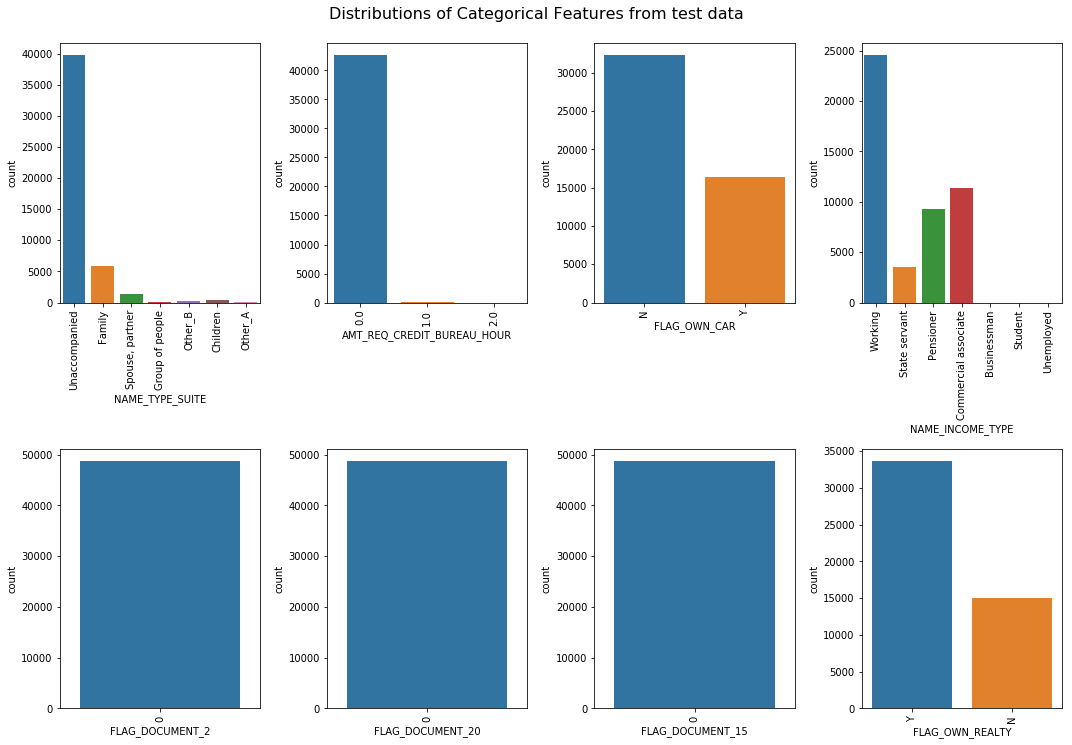

In [39]:
distribution_bar(app_test,'test data',['NAME_TYPE_SUITE','AMT_REQ_CREDIT_BUREAU_HOUR','FLAG_OWN_CAR','NAME_INCOME_TYPE','FLAG_DOCUMENT_2','FLAG_DOCUMENT_20','FLAG_DOCUMENT_15','FLAG_OWN_REALTY'])

We can notice from the ditributions of both the train and test data that the 'FLAG_DOCUMENT' has mostly 0s. So we will remove them from our train and test data. 

In [ ]:
# Remove the Flag document fields from the train and test data


In [30]:
inst_pay.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


In [ ]:
#Merging data


In [ ]:
#One hot encoding 

In [9]:
bur.head(10)

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.00,0.00,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.00,171342.00,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.50,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.00,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.00,NaN,NaN,0.0,Consumer credit,-21,NaN
5,215354,5714467,Active,currency 1,-273,0,27460.0,NaN,0.0,0,180000.00,71017.38,108982.62,0.0,Credit card,-31,NaN
6,215354,5714468,Active,currency 1,-43,0,79.0,NaN,0.0,0,42103.80,42103.80,0.00,0.0,Consumer credit,-22,NaN
7,162297,5714469,Closed,currency 1,-1896,0,-1684.0,-1710.0,14985.0,0,76878.45,0.00,0.00,0.0,Consumer credit,-1710,NaN
8,162297,5714470,Closed,currency 1,-1146,0,-811.0,-840.0,0.0,0,103007.70,0.00,0.00,0.0,Consumer credit,-840,NaN
9,162297,5714471,Active,currency 1,-1146,0,-484.0,NaN,0.0,0,4500.00,0.00,0.00,0.0,Credit card,-690,NaN


In [11]:
bur_bal.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [14]:
bur_bal.STATUS.value_counts()

C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: STATUS, dtype: int64